In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [20]:
folders = Path(r'results\test_result').iterdir()

# sort the folders by the epoch number in the 2nd part of the folder name
folders = sorted(folders, key=lambda x: int(x.parts[-1].split('_')[1]))

In [21]:
response_history = []
for folder in folders:

    mat = sio.loadmat(folder/'params.mat')
    response_history.append(mat['response'])

response_history = np.array(response_history) # shape: (n_epochs, n_filter, n_wl)

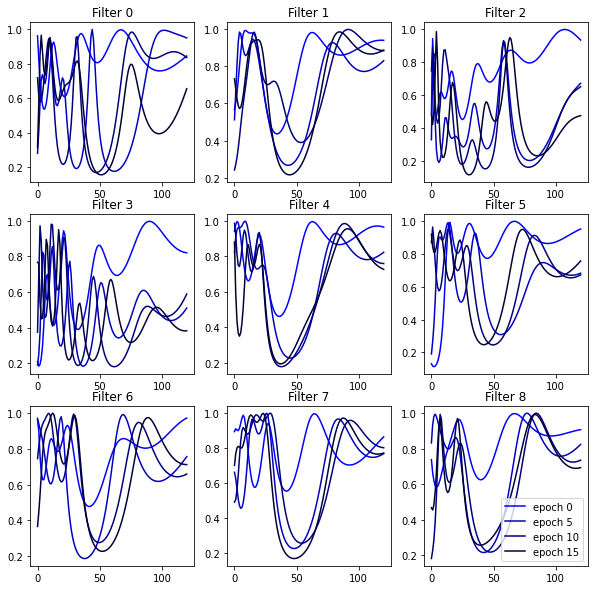

In [23]:
plt.figure(figsize=(10,10))
for filter in range(response_history.shape[1]):
    plt.subplot(3,3,filter+1)
    # the more epoch the darker the blue color
    for epoch in range(0,response_history.shape[0],5):
        plt.plot(response_history[epoch, filter, :], color=(0, 0, 1 - epoch/response_history.shape[0]),label=f'epoch {epoch}')
    
    plt.title(f'Filter {filter}')
plt.legend()
plt.show()